# We processed the data, now we will use different models, train them and at the end make prediction that we will export and submit on Kaggle.com

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import MultipleLocator

### First we will export data and split to train and test

In [2]:
data = pd.read_csv('training.csv')
test = pd.read_csv('testing.csv')

In [3]:
X_train = data.drop('Transported', axis=1)
y_train = data['Transported']
X_test = test

### Logistic Regression

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_train)
y_test_lg = logreg.predict(X_test)
print('Train accuracy score:',accuracy_score(y_train,y_pred))

Train accuracy score: 0.7825925006208095


/home/noobix/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Random Forrest

In [5]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
predict = rfc.predict(X_train)
y_test_rfc = rfc.predict(X_test)
print('Train accuracy score:',accuracy_score(y_train,predict))

Train accuracy score: 0.9997516761857462


### K-Nearest Neigbhour

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(X_train,y_train)
predictions = knn.predict(X_train)
y_test_knn = knn.predict(X_test)
print('Train accuracy score: ',accuracy_score(y_train,predictions))

Train accuracy score:  0.8208343680158927


### Tensor Flow

In [7]:
from sklearn.model_selection import train_test_split
X_train = data.drop('Transported',axis=1)
y_train = data['Transported']
X_test = test

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

2022-11-16 19:16:19.221354: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-16 19:16:19.221409: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-16 19:16:19.346449: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-16 19:16:20.942738: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-11-16 19:16:20.942953: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: ca

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8054 entries, 0 to 8053
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Group         8054 non-null   int64  
 1   HomePlanet    8054 non-null   float64
 2   CryoSleep     8054 non-null   float64
 3   Deck          8054 non-null   float64
 4   Destination   8054 non-null   float64
 5   Age           8054 non-null   float64
 6   VIP           8054 non-null   float64
 7   RoomService   8054 non-null   float64
 8   FoodCourt     8054 non-null   float64
 9   ShoppingMall  8054 non-null   float64
 10  Spa           8054 non-null   float64
 11  VRDeck        8054 non-null   float64
 12  Transported   8054 non-null   bool   
dtypes: bool(1), float64(11), int64(1)
memory usage: 763.1 KB


In [10]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw


# input layer
model.add(Dense(1024, activation='relu', input_shape=[12]))
model.add(Dropout(0.2))

# hidden layer

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

2022-11-16 19:16:58.435642: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-16 19:16:58.436405: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-16 19:16:58.436511: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (noobix): /proc/driver/nvidia/version does not exist


In [11]:
model.fit(x=X_train,
          y=y_train,
          epochs=300,
          batch_size=256,)

Epoch 1/300
32/32 [==============================] - 4s 85ms/step - loss: 0.5530 - binary_accuracy: 0.7121
Epoch 2/300
32/32 [==============================] - 3s 85ms/step - loss: 0.4910 - binary_accuracy: 0.7605
Epoch 3/300
32/32 [==============================] - 3s 87ms/step - loss: 0.4661 - binary_accuracy: 0.7776
Epoch 4/300
32/32 [==============================] - 3s 105ms/step - loss: 0.4474 - binary_accuracy: 0.7830
Epoch 5/300
32/32 [==============================] - 3s 86ms/step - loss: 0.4397 - binary_accuracy: 0.7914
Epoch 6/300
32/32 [==============================] - 3s 87ms/step - loss: 0.4300 - binary_accuracy: 0.7965
Epoch 7/300
32/32 [==============================] - 3s 87ms/step - loss: 0.4307 - binary_accuracy: 0.7903
Epoch 8/300
32/32 [==============================] - 3s 87ms/step - loss: 0.4263 - binary_accuracy: 0.7945
Epoch 9/300
32/32 [==============================] - 3s 100ms/step - loss: 0.4222 - binary_accuracy: 0.7980
Epoch 10/300
32/32 [===============

32/32 [==============================] - 3s 89ms/step - loss: 0.3709 - binary_accuracy: 0.8180
Epoch 77/300
32/32 [==============================] - 3s 86ms/step - loss: 0.3679 - binary_accuracy: 0.8215
Epoch 78/300
32/32 [==============================] - 3s 87ms/step - loss: 0.3661 - binary_accuracy: 0.8221
Epoch 79/300
32/32 [==============================] - 3s 104ms/step - loss: 0.3667 - binary_accuracy: 0.8212
Epoch 80/300
32/32 [==============================] - 3s 88ms/step - loss: 0.3705 - binary_accuracy: 0.8190
Epoch 81/300
32/32 [==============================] - 3s 87ms/step - loss: 0.3662 - binary_accuracy: 0.8221
Epoch 82/300
32/32 [==============================] - 3s 85ms/step - loss: 0.3678 - binary_accuracy: 0.8169
Epoch 83/300
32/32 [==============================] - 3s 86ms/step - loss: 0.3708 - binary_accuracy: 0.8192
Epoch 84/300
32/32 [==============================] - 3s 106ms/step - loss: 0.3654 - binary_accuracy: 0.8205
Epoch 85/300
32/32 [===================

32/32 [==============================] - 3s 98ms/step - loss: 0.3327 - binary_accuracy: 0.8371
Epoch 152/300
32/32 [==============================] - 3s 83ms/step - loss: 0.3379 - binary_accuracy: 0.8341
Epoch 153/300
32/32 [==============================] - 4s 114ms/step - loss: 0.3379 - binary_accuracy: 0.8377
Epoch 154/300
32/32 [==============================] - 3s 85ms/step - loss: 0.3340 - binary_accuracy: 0.8388
Epoch 155/300
32/32 [==============================] - 3s 85ms/step - loss: 0.3365 - binary_accuracy: 0.8364
Epoch 156/300
32/32 [==============================] - 3s 109ms/step - loss: 0.3305 - binary_accuracy: 0.8367
Epoch 157/300
32/32 [==============================] - 3s 87ms/step - loss: 0.3328 - binary_accuracy: 0.8378
Epoch 158/300
32/32 [==============================] - 3s 87ms/step - loss: 0.3350 - binary_accuracy: 0.8335
Epoch 159/300
32/32 [==============================] - 3s 100ms/step - loss: 0.3360 - binary_accuracy: 0.8366
Epoch 160/300
32/32 [=========

32/32 [==============================] - 3s 95ms/step - loss: 0.3052 - binary_accuracy: 0.8508
Epoch 227/300
32/32 [==============================] - 3s 102ms/step - loss: 0.3057 - binary_accuracy: 0.8516
Epoch 228/300
32/32 [==============================] - 3s 91ms/step - loss: 0.2977 - binary_accuracy: 0.8573
Epoch 229/300
32/32 [==============================] - 3s 85ms/step - loss: 0.3015 - binary_accuracy: 0.8520
Epoch 230/300
32/32 [==============================] - 3s 102ms/step - loss: 0.3014 - binary_accuracy: 0.8541
Epoch 231/300
32/32 [==============================] - 3s 85ms/step - loss: 0.2991 - binary_accuracy: 0.8561
Epoch 232/300
32/32 [==============================] - 3s 89ms/step - loss: 0.3009 - binary_accuracy: 0.8514
Epoch 233/300
32/32 [==============================] - 3s 88ms/step - loss: 0.3012 - binary_accuracy: 0.8544
Epoch 234/300
32/32 [==============================] - 3s 84ms/step - loss: 0.2977 - binary_accuracy: 0.8561
Epoch 235/300
32/32 [==========

<AxesSubplot:>

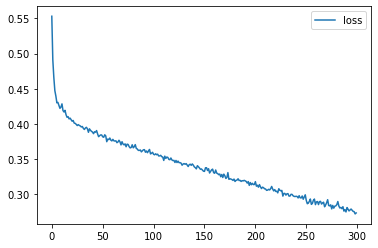

In [12]:
losses = pd.DataFrame(model.history.history)
losses[['loss']].plot()

In [13]:
from tensorflow.keras.models import load_model

from sklearn.metrics import classification_report,confusion_matrix  
predictions = (model.predict(X_train) > 0.5).astype("bool")
y_test_tf = (model.predict(X_test) > 0.5).astype('bool')
print(classification_report(y_train,predictions))

134/134 [==============================] - 1s 7ms/step
              precision    recall  f1-score   support

       False       0.90      0.87      0.88      4011
        True       0.87      0.90      0.89      4043

    accuracy                           0.88      8054
   macro avg       0.88      0.88      0.88      8054
weighted avg       0.88      0.88      0.88      8054



In [14]:
confusion_matrix(y_train,predictions)

array([[3471,  540],
       [ 399, 3644]])

## Exporting Prediction

### Logistic regression

In [15]:
subs = pd.read_csv('sample_submission.csv')
y_test_lg.astype(bool)
subs['Transported'] = y_test_lg

subs.to_csv('Transported_lg.csv', index = False)

### Random Forrest

In [16]:
subs = pd.read_csv('sample_submission.csv')
y_test_rfc.astype(bool)
subs['Transported'] = y_test_rfc

subs.to_csv('Transported_rfc.csv', index = False)

### K-Nearest Neigbhour

In [17]:
subs = pd.read_csv('sample_submission.csv')
y_test_knn.astype(bool)
subs['Transported'] = y_test_knn

subs.to_csv('Transported_knn.csv', index = False)

### Tensor Flow

In [18]:
subs = pd.read_csv('sample_submission.csv')
y_test_tf.astype(bool)
subs['Transported'] = y_test_tf

subs.to_csv('Transported_tf.csv', index = False)